# specMACS cloudmask

The following script exemplifies the access and usage of specMACS data measured 
during EUREC4A.  

More information on the dataset can be found at https://macsserver.physik.uni-muenchen.de/campaigns/EUREC4A/products/cloudmask/. If you have questions or if you would like to use the data for a publication, please don't hesitate to get in contact with the dataset authors as stated in the dataset attributes `contact` and `author` list.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Get data
Loading the data in a two step approach. 
* First, the EUREC4A meta data catalogue is loaded
* Second, instrument name and variable are selected and passed on to dask

*Note: have a look at the attributes of the xarray dataset `ds` for all relevant information on the data.*

In [2]:
import eurec4a
from intake import open_catalog

In [7]:
# cat = eurec4a.get_intake_catalog()
cat = open_catalog("../eurec4a-intake/catalog.yml")
list(cat)

['radiosondes', 'barbados', 'dropsondes', 'HALO', 'p3']

In [24]:
ds = cat.HALO.specMACS.cloudmask_20200205.to_dask()
#ds = cat.HALO.specMACS.cloudmask["flight_id"].to_dask()
ds

## Load HALO flight phase information
All HALO flights were split up into flight phases or segments to allow for a precise selection in time and space of a circle or calibration pattern. For more information have a look at the respective [github repository](https://github.com/eurec4a/halo-flight-phase-separation).

In [17]:
meta = eurec4a.get_flight_segments()

We further select the first straight leg on February 5 by it's `segment_id`.

In [18]:
segments = {s["segment_id"]: {**s, "flight_id": flight["flight_id"]}
             for platform in meta.values()
             for flight in platform.values()
             for s in flight["segments"]
            }
seg = segments["HALO-0205_sl1"]

We transfer the information from our flight segment selection to the specMACS data in the xarray dataset.

In [19]:
ds_selection = ds.sel(time=slice(seg["start"], seg["end"]))

## Plots
Figure 1: shows the SWIR camera radiance measurements at 1.5 micron along the flight track (x axis) for all observations in accross track directions (y axis).  
Figure 2: the same as Figure 1, but showing the cloud mask product.  

You can get a list of available variables in the dataset from `ds_selection.variables.keys()`  
*Note: fetching the data and displaying it might take a few seconds*

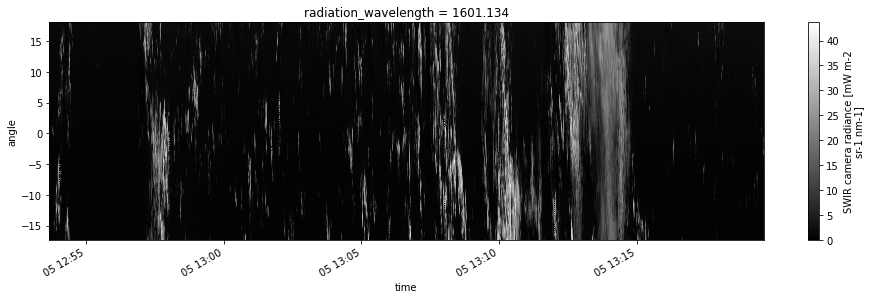

In [21]:
fig, ax = plt.subplots(figsize=(16,4))
ds_selection.swir_radiance.T.plot(ax=ax, cmap="gray")

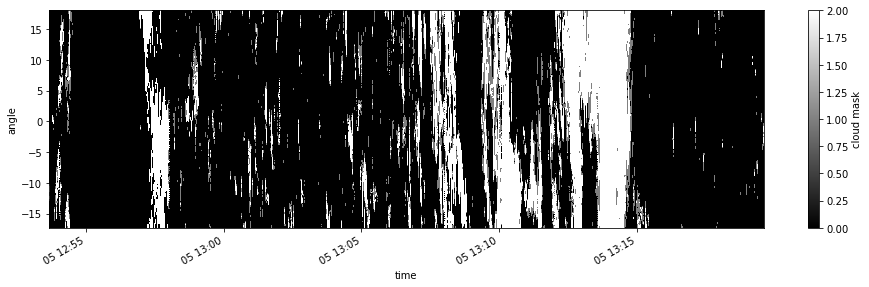

In [22]:
fig, ax = plt.subplots(figsize=(16,4))
ds_selection.cloud_mask.T.plot(ax=ax, cmap="gray")